In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

# Load the datasets by filling this space
df = pd.read_csv('/content/mock_company_snapshot.csv')
df_ts = pd.read_csv('/content/mock_price_timeseries.csv')

### **Task 1: Explore the Company Dataset**
- Display the structure of the dataset (`.info()`)
- Get summary statistics using `.describe()`
- Count the number of unique sectors


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     10 non-null     object 
 1   Sector      10 non-null     object 
 2   Price       10 non-null     float64
 3   Volume      10 non-null     int64  
 4   P/E Ratio   10 non-null     float64
 5   Market Cap  10 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 612.0+ bytes


In [ ]:
df.describe()

,Price,Volume,P/E Ratio,Market Cap
count,10.000000,1.000000e+01,10.000000,1.000000e+01
mean,1868.465000,4.959383e+06,39.695000,9.110922e+09
std,1073.944838,2.310119e+06,28.280642,8.393797e+09
min,297.480000,1.103355e+06,10.640000,1.292482e+09
25%,816.205000,3.161360e+06,15.187500,3.717051e+09
50%,2139.615000,5.522521e+06,37.685000,5.379697e+09
75%,2568.447500,6.493968e+06,54.420000,1.351021e+10
max,3332.430000,8.404852e+06,97.640000,2.800858e+10


In [ ]:
df.nunique()

,0
Company,10
Sector,6
Price,10
Volume,10
P/E Ratio,10
Market Cap,10


In [ ]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     300 non-null    object 
 1   Company  300 non-null    object 
 2   Price    300 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


In [ ]:
df_ts.describe()

,Price
count,300.000000
mean,1869.684867
std,1022.908876
min,263.710000
25%,639.120000
50%,2140.425000
75%,2600.842500
max,3347.610000


In [ ]:
df_ts.nunique()

,0
Date,30
Company,10
Price,299


### **Task 2: Calculate Financial Ratios**
- Create a new column `Earnings = Price / P/E Ratio`
- Round it to 2 decimal places
- Sort companies by earnings in descending order


In [ ]:
df['Earning'] = df['Price'] / df['P/E Ratio']

In [ ]:
df['Earning'] = round(df['Earning'], 2)

In [ ]:
df.head(5)

,Company,Sector,Price,Volume,P/E Ratio,Market Cap,Earning
0,AAPL,Tech,1373.44,5523669,10.64,7.586428e+09,129.08
1,GOOGL,Tech,3332.43,8404852,12.08,2.800858e+10,275.86
2,MSFT,Tech,2588.78,5981505,57.23,1.548480e+10,45.23
3,AMZN,E-commerce,2135.44,2766891,45.99,5.908530e+09,46.43
4,TSLA,Auto,630.46,5521373,14.20,3.481005e+09,44.40


In [ ]:
df.sort_values('Earning', ascending=False)

,Company,Sector,Price,Volume,P/E Ratio,Market Cap,Earning
1,GOOGL,Tech,3332.43,8404852,12.08,2.800858e+10,275.86
7,NFLX,Streaming,3045.00,1103355,18.15,3.359716e+09,167.77
0,AAPL,Tech,1373.44,5523669,10.64,7.586428e+09,129.08
9,BAC,Finance,2507.45,6664789,44.42,1.671163e+10,56.45
3,AMZN,E-commerce,2135.44,2766891,45.99,5.908530e+09,46.43
2,MSFT,Tech,2588.78,5981505,57.23,1.548480e+10,45.23
4,TSLA,Auto,630.46,5521373,14.20,3.481005e+09,44.40
8,JPM,Finance,2143.79,2262752,65.65,4.850865e+09,32.65
6,META,Social,297.48,4344769,30.95,1.292482e+09,9.61
5,NVDA,Tech,630.38,7019877,97.64,4.425190e+09,6.46


### **Task 3: Filter High-Value Stocks**
- Select companies with:
  - Market Cap > $100B
  - P/E Ratio < 40
- Sort results by Market Cap (descending)


In [ ]:
fildf = df[(df['Market Cap'] > 100)  & (df['P/E Ratio'] < 40)]

In [ ]:
fildf.head(5)

,Company,Sector,Price,Volume,P/E Ratio,Market Cap,Earning
0,AAPL,Tech,1373.44,5523669,10.64,7.586428e+09,129.08
1,GOOGL,Tech,3332.43,8404852,12.08,2.800858e+10,275.86
4,TSLA,Auto,630.46,5521373,14.20,3.481005e+09,44.40
6,META,Social,297.48,4344769,30.95,1.292482e+09,9.61
7,NFLX,Streaming,3045.00,1103355,18.15,3.359716e+09,167.77


In [ ]:
df.sort_values('Market Cap', ascending= False)

,Company,Sector,Price,Volume,P/E Ratio,Market Cap,Earning
1,GOOGL,Tech,3332.43,8404852,12.08,2.800858e+10,275.86
9,BAC,Finance,2507.45,6664789,44.42,1.671163e+10,56.45
2,MSFT,Tech,2588.78,5981505,57.23,1.548480e+10,45.23
0,AAPL,Tech,1373.44,5523669,10.64,7.586428e+09,129.08
3,AMZN,E-commerce,2135.44,2766891,45.99,5.908530e+09,46.43
8,JPM,Finance,2143.79,2262752,65.65,4.850865e+09,32.65
5,NVDA,Tech,630.38,7019877,97.64,4.425190e+09,6.46
4,TSLA,Auto,630.46,5521373,14.20,3.481005e+09,44.40
7,NFLX,Streaming,3045.00,1103355,18.15,3.359716e+09,167.77
6,META,Social,297.48,4344769,30.95,1.292482e+09,9.61


### **Task 4: Aggregate by Sector**
- Group data by sector
- Calculate:
  - Total Market Cap
  - Average Price
- Plot a bar chart of top 5 sectors by Market Cap


In [ ]:
grouped = df.groupby("Sector").agg(Total_Market_Cap=("Market Cap", "sum"),Average_Price=("Price", "mean")).reset_index()
sector = grouped.head(5)

In [ ]:
sector.head(5)

,Sector,Total_Market_Cap,Average_Price
0,Auto,3.481005e+09,630.46
1,E-commerce,5.908530e+09,2135.44
2,Finance,2.156249e+10,2325.62
3,Social,1.292482e+09,297.48
4,Streaming,3.359716e+09,3045.00


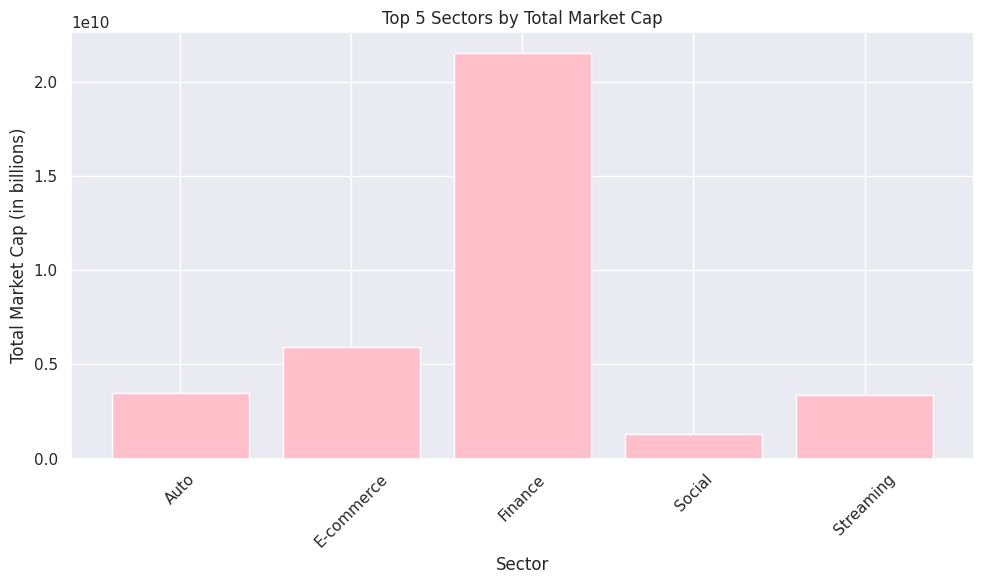

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(sector["Sector"], sector["Total_Market_Cap"], color="pink")
plt.title("Top 5 Sectors by Total Market Cap")
plt.xlabel("Sector")
plt.ylabel("Total Market Cap (in billions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Task 5: Boxplot of Price by Sector**
- Visualize price distribution across different sectors using `sns.boxplot`
- Rotate x-axis labels and add a title


<ipython-input-53-2b0133e1e4e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sector", y="Company", data=df, palette="coolwarm")


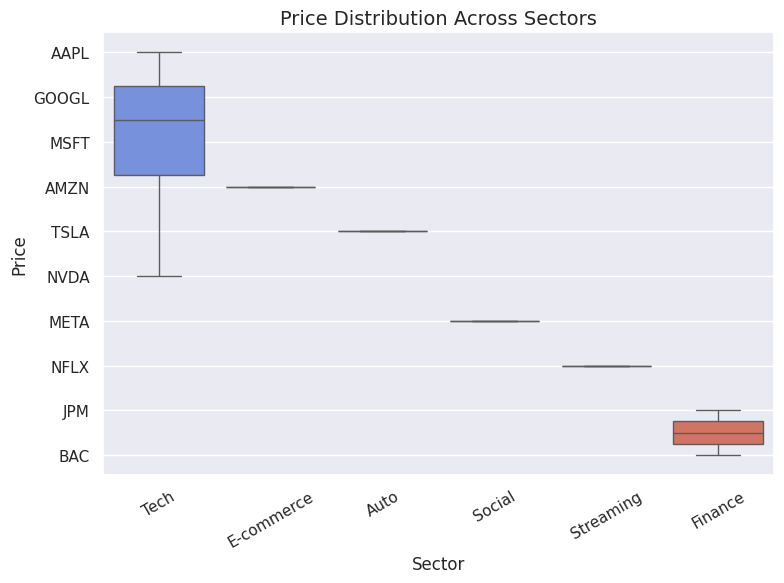

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sector", y="Company", data=df, palette="coolwarm")


plt.title("Price Distribution Across Sectors", fontsize=14)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### **Task 6: Correlation Heatmap**
- Select numeric columns
- Use `.corr()` to compute correlation matrix
- Plot using `sns.heatmap()`


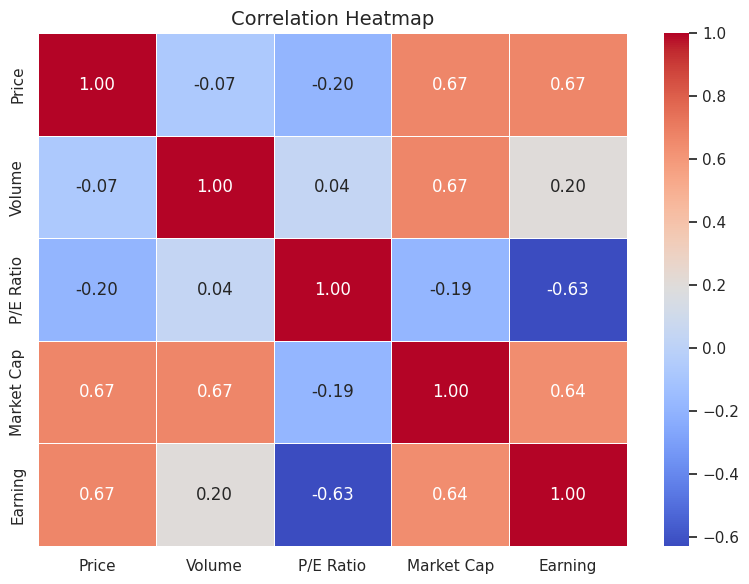

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

### **Task 7: Time Series Plot**
- Plot 30-day price trends for 2 companies
- Use `sns.lineplot()` and distinguish using `hue="Company"`


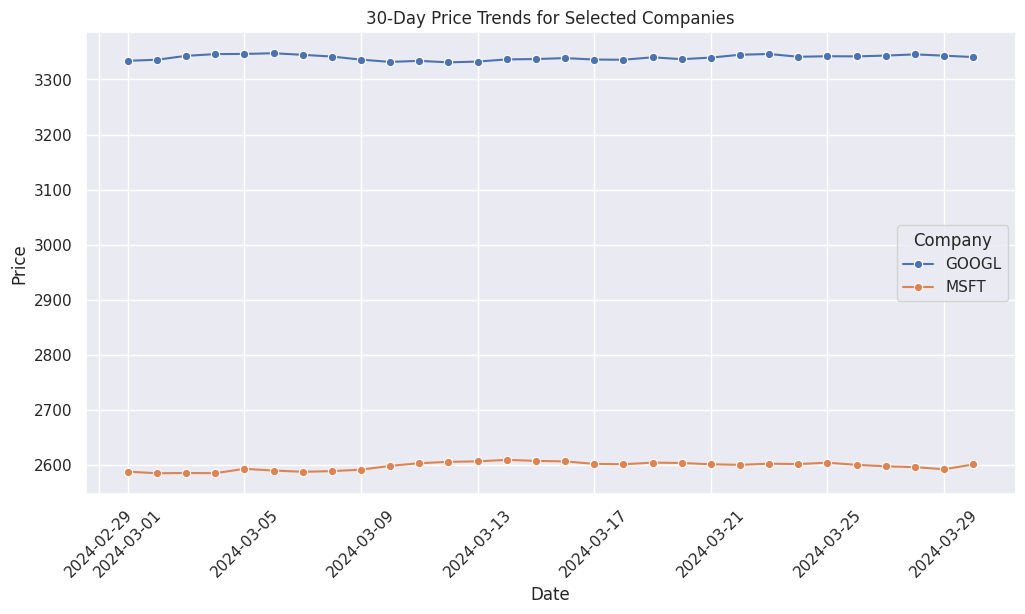

In [ ]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'])

filtered_companies = df_ts['Company'].unique()[1:3]
df_selected = df_ts[df_ts['Company'].isin(filtered_companies)]
df_selected = df_selected.sort_values('Date').groupby('Company').tail(30)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price', hue='Company', data=df_selected, marker="o")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("30-Day Price Trends for Selected Companies")
plt.xticks(rotation=45)
plt.show()

### **Task 8: Moving Average**
- For `TSLA`, calculate a 7-day moving average
- Plot original prices and the moving average


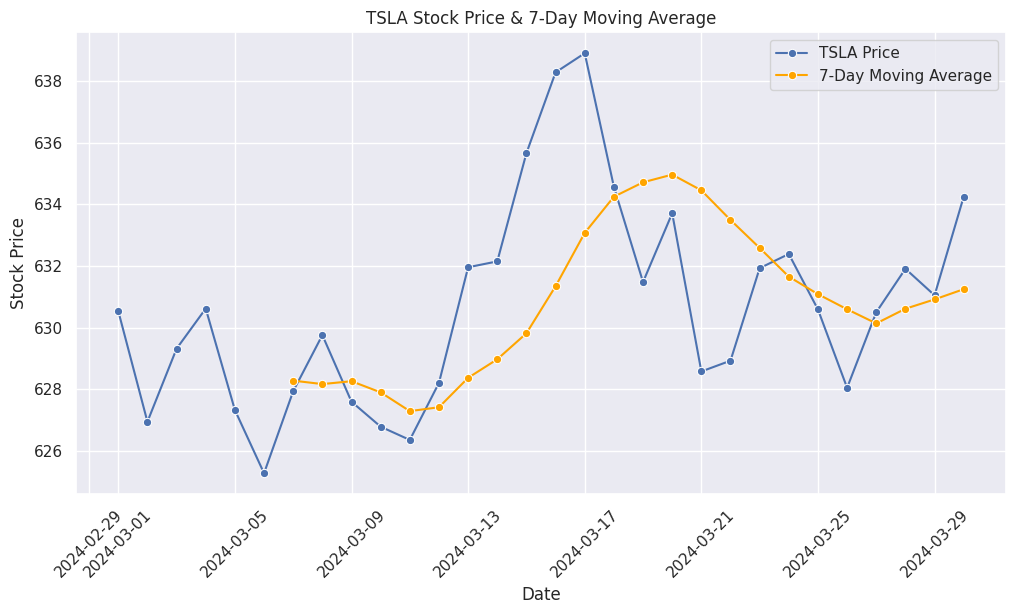

In [ ]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
tsla_data = df_ts[df_ts['Company'] == 'TSLA'].copy()
tsla_data = tsla_data.sort_values(by='Date')
tsla_data['7-Day MA'] = tsla_data['Price'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=tsla_data, x='Date', y='Price', label='TSLA Price', marker="o")
sns.lineplot(data=tsla_data, x='Date', y='7-Day MA', label='7-Day Moving Average', marker="o", color='orange')
plt.title("TSLA Stock Price & 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

### **Task 9: Multi-Line Volatility Comparison**
- Compare daily price trends of 3 companies over 30 days
- Use line plot with `hue="Company"`


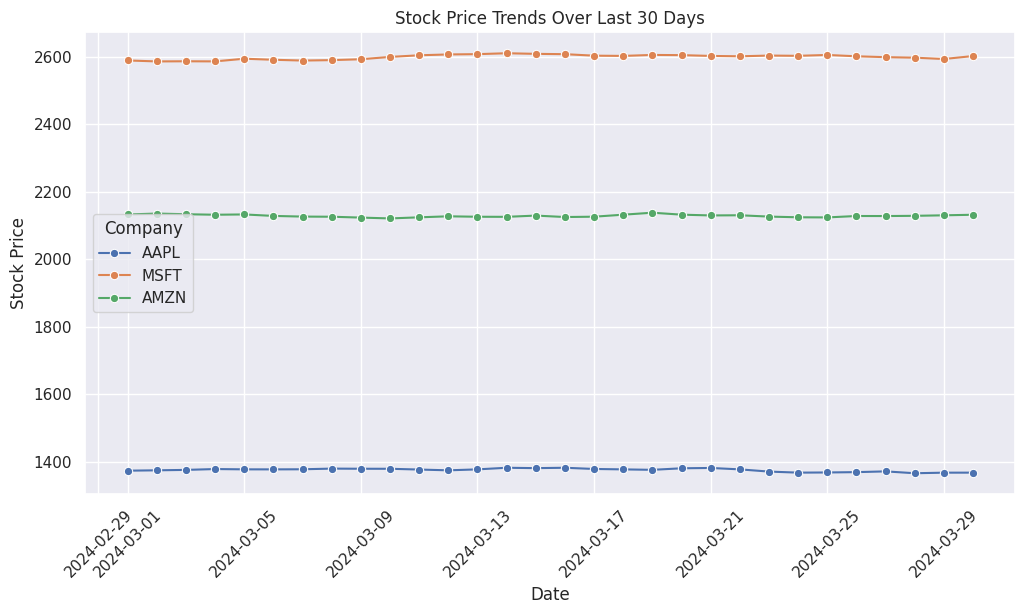

In [ ]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'])

last_30_days = df_ts['Date'].max() - pd.Timedelta(days=30)
df_last_30 = df_ts[df_ts['Date'] >= last_30_days]
selected_companies = ['MSFT', 'AMZN', 'AAPL']
df_filtered = df_last_30[df_last_30['Company'].isin(selected_companies)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='Date', y='Price', hue='Company', marker='o')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Trends Over Last 30 Days')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

### **Task 10: Financial Dashboard**
- Create a 2x2 dashboard with:
  - AAPL trend
  - P/E Ratio histogram
  - Sector-wise earnings boxplot
  - Correlation heatmap


<ipython-input-67-545785886ff6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sector', y='Earnings', ax=axes[1, 0], palette='coolwarm')


<Figure size 1200x800 with 0 Axes>

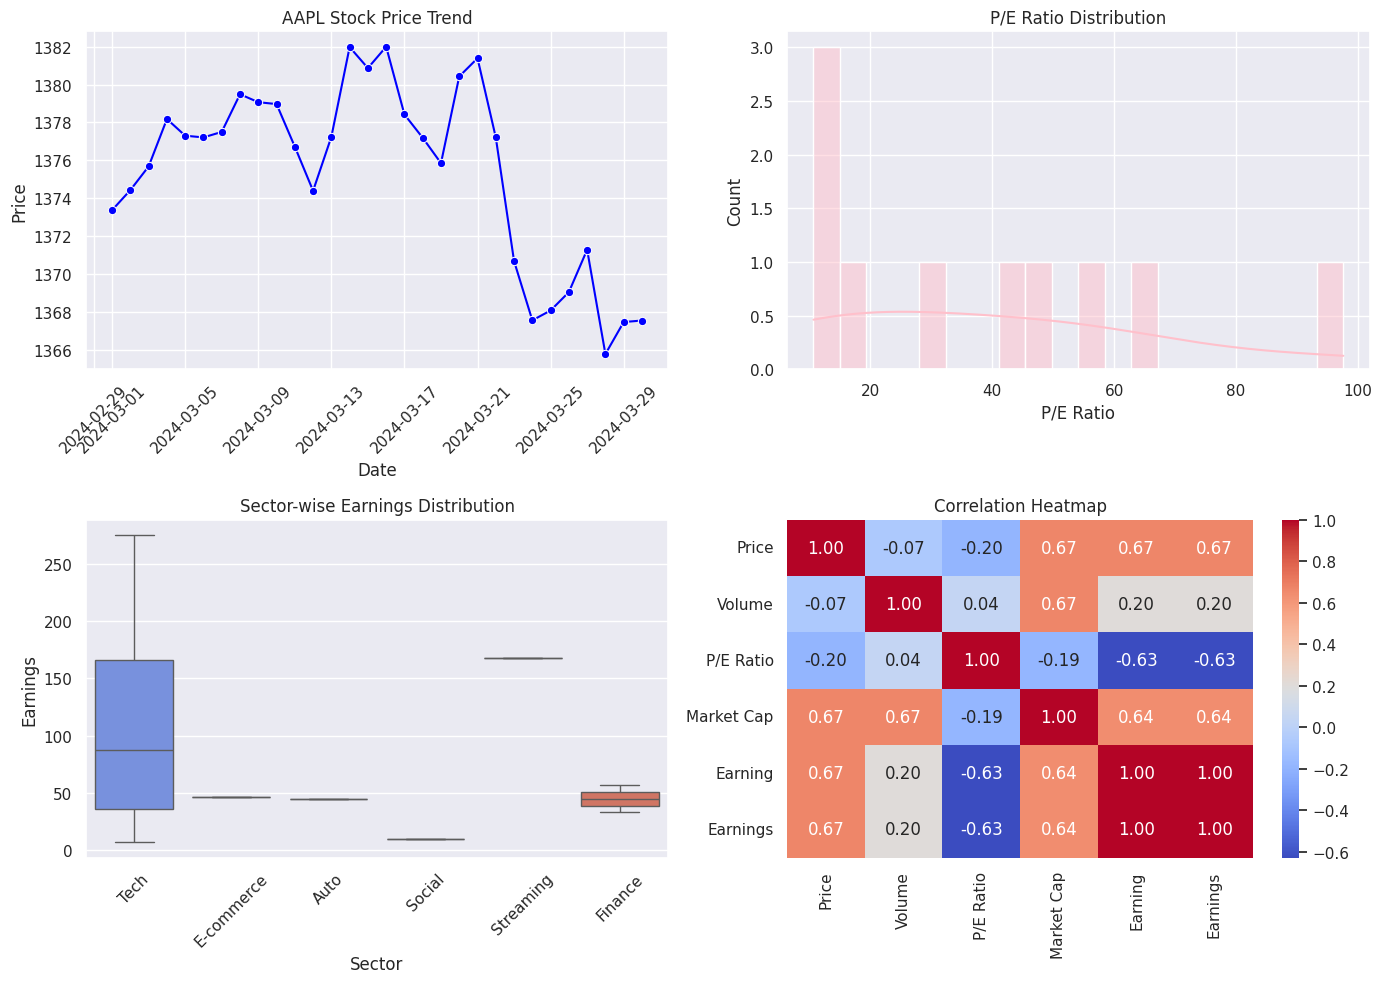

In [ ]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'])

aapl_data = df_ts[df_ts['Company'] == 'AAPL']
plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.lineplot(data=aapl_data, x='Date', y='Price', ax=axes[0, 0], color='blue', marker='o')
axes[0, 0].set_title('AAPL Stock Price Trend')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')
axes[0, 0].tick_params(axis='x', rotation=45)
sns.histplot(df['P/E Ratio'], bins=20, kde=True, ax=axes[0, 1], color='pink')
axes[0, 1].set_title('P/E Ratio Distribution')
axes[0, 1].set_xlabel('P/E Ratio')
df['Earnings'] = df['Price'] / df['P/E Ratio']
sns.boxplot(data=df, x='Sector', y='Earnings', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Sector-wise Earnings Distribution')
axes[1, 0].set_xlabel('Sector')
axes[1, 0].set_ylabel('Earnings')
axes[1, 0].tick_params(axis='x', rotation=45)
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')
plt.tight_layout()
plt.show()